In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Load data from keras
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
#The dataset returns 4 numpy arrays of train and test data (Image ranges 28*28 arrays, pixel values 0-255, labels 0-9, no class name)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
#Check dimension of train images (60,000 images, each image represented by 28*28 numpy pixels)
train_images.shape

(60000, 28, 28)

In [8]:
#Explore Labels show 0 to 9 int labels 
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
#Check size of test set
test_images.shape

(10000, 28, 28)

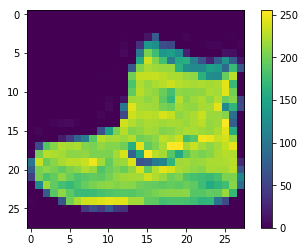

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#Both train and test data need to be sclaed
train_images = train_images / 255.0
test_images = test_images / 255.0

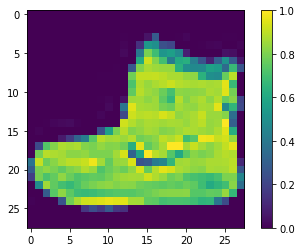

In [12]:
#Re-inspect an image to ensure pre-processing is done
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

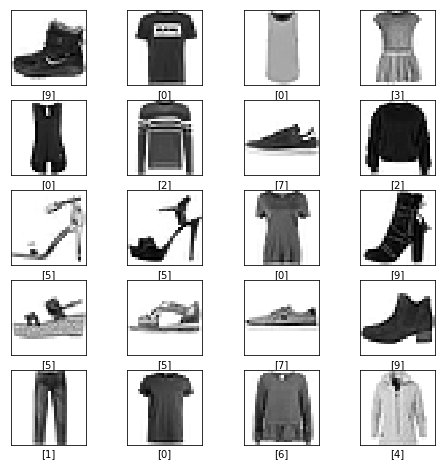

In [15]:
#Investigate the first 20 images before model building
plt.figure(figsize = (8, 8)) #Without figsize xlabels are hidden
for i in range(20):
    plt.subplot(5, 4, i+1) #Subplot lets you plot multiple subplots (nrows, ncols, index)
    plt.xticks([]) #hides ticks, which otherwise shows 0-25
    plt.yticks([])
    plt.grid(False)
    plt.xlabel([train_labels[i]]) #not clear how classes are assigned to labels
    plt.imshow(train_images[i], cmap=plt.cm.binary)  #using cmap = 'gray' gives black bg
plt.show()

In [16]:
#Building layers
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)), #Layer to flatten 2D array of px to 28*28 1D array
        keras.layers.Dense(128, activation='relu'), #128 and 10 below are no. of nodes
        keras.layers.Dense(10, activation='softmax') #returns output as 10 probability scores (for labels) that sums up to 1
])

In [17]:
#Compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [18]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4973 - accuracy: 0.8263
Epoch 2/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3737 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3354 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3123 - accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2928 - accuracy: 0.8929
Epoch 6/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2802 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2665 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2557 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2482 - accuracy: 0.9077
Epoc

In [19]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Accuracy of test set: ', test_accuracy)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy of test set:  0.8776
